<a href="https://colab.research.google.com/github/adebayor01/netflix-data-analysis/blob/main/Copy_of_netflix_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/My Drive/netflix_titles.csv")

df = pd.read

In [ ]:
#Basic Overview
print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())
df.info()
df.head()

Shape of dataset: (7964, 16)
Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'year_added', 'month_added', 'duration_int', 'duration_type']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7964 entries, 0 to 7963
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        7964 non-null   object        
 1   type           7964 non-null   object        
 2   title          7964 non-null   object        
 3   director       7964 non-null   object        
 4   cast           7964 non-null   object        
 5   country        7964 non-null   object        
 6   date_added     7964 non-null   datetime64[ns]
 7   release_year   7964 non-null   int64         
 8   rating         7964 non-null   object        
 9   duration       7964 non-null   object        
 10  listed_in      7964 non-null   objec

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_int,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,90,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,2,Seasons
2,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,2,Seasons
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,125,min
4,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9,9,Seasons


In [ ]:
#Handle Missing Values
print("\nMissing values per column:\n", (df.isnull().sum()/len(df))*100)


Missing values per column:
 show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
year_added      0.0
month_added     0.0
dtype: float64


In [ ]:
# Fill missing values for director and cast
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

In [ ]:
# Drop rows with missing 'country' or 'date_added'
df.dropna(subset=['country', 'date_added','duration'], inplace=True)

In [ ]:
#Remove Duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#Clean Text Columns
text_cols = ['title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip()

In [ ]:
#Convert Date Column
df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [ ]:
#Handle Duration Column
df[['duration_int', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s+(\w+)')
df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')

#Reset Index
df.reset_index(drop=True, inplace=True)

In [ ]:
#Final Check
print("\nCleaned Data Overview:")
print(df.info())
df.head()


Cleaned Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7964 entries, 0 to 7963
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        7964 non-null   object        
 1   type           7964 non-null   object        
 2   title          7964 non-null   object        
 3   director       7964 non-null   object        
 4   cast           7964 non-null   object        
 5   country        7964 non-null   object        
 6   date_added     7964 non-null   datetime64[ns]
 7   release_year   7964 non-null   int64         
 8   rating         7964 non-null   object        
 9   duration       7964 non-null   object        
 10  listed_in      7964 non-null   object        
 11  description    7964 non-null   object        
 12  year_added     7964 non-null   int32         
 13  month_added    7964 non-null   int32         
 14  duration_int   7964 non-null   int64         
 1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_int,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,90,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,2,Seasons
2,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,2,Seasons
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,125,min
4,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9,9,Seasons


/tmp/ipython-input-71-2532163575.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


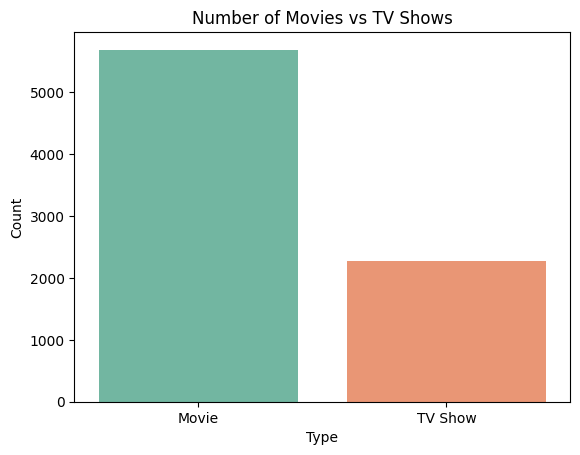

In [ ]:
#Content Type Count (Movies vs TV Shows)
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Number of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

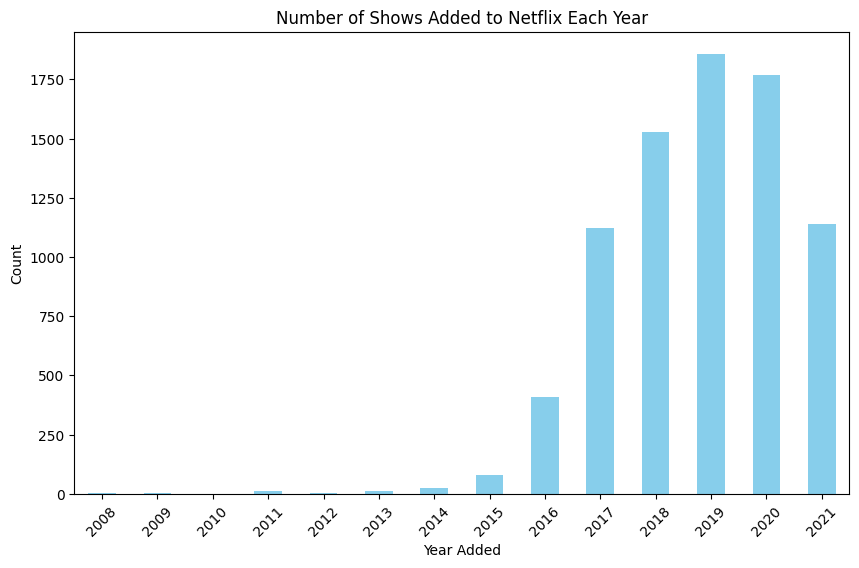

In [ ]:
#Content Added Per Year
plt.figure(figsize=(10,6))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Shows Added to Netflix Each Year')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-73-3826951579.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


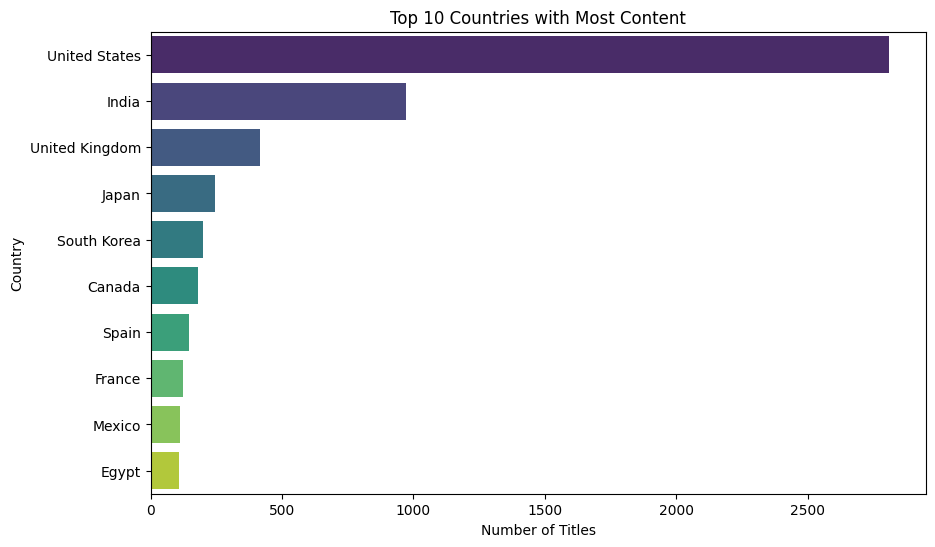

In [ ]:
#Top 10 Countries with Most Content
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

/tmp/ipython-input-74-2159624774.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index[:10], palette='coolwarm')


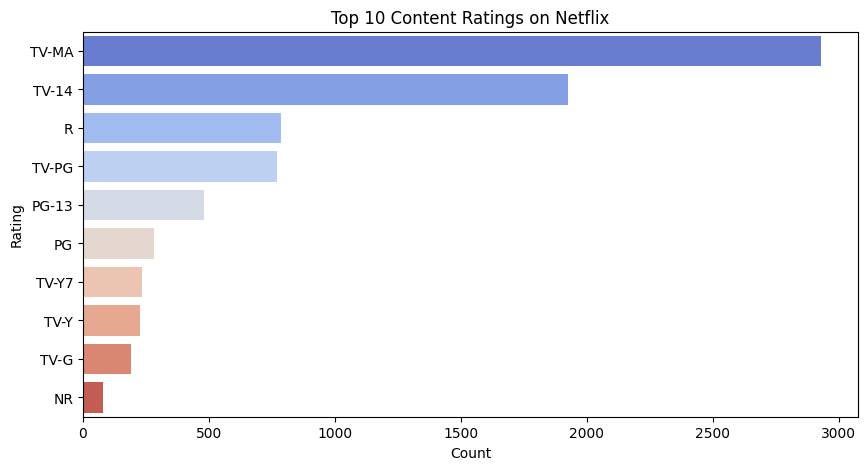

In [ ]:
#Most Common Ratings
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index[:10], palette='coolwarm')
plt.title('Top 10 Content Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

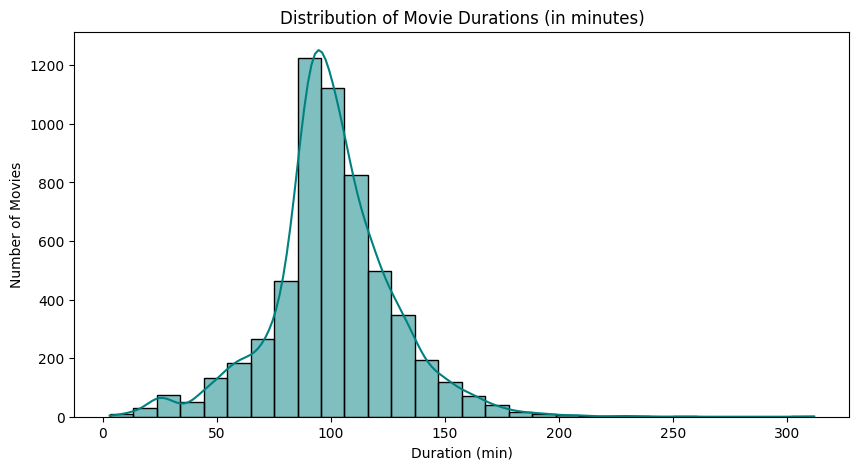

In [ ]:
#Average Duration of Movies
movie_df = df[df['type'] == 'Movie']
plt.figure(figsize=(10,5))
sns.histplot(movie_df['duration_int'], bins=30, kde=True, color='teal')
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Movies')
plt.show()

/tmp/ipython-input-76-2419434161.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts, y=genre_names, palette='magma')


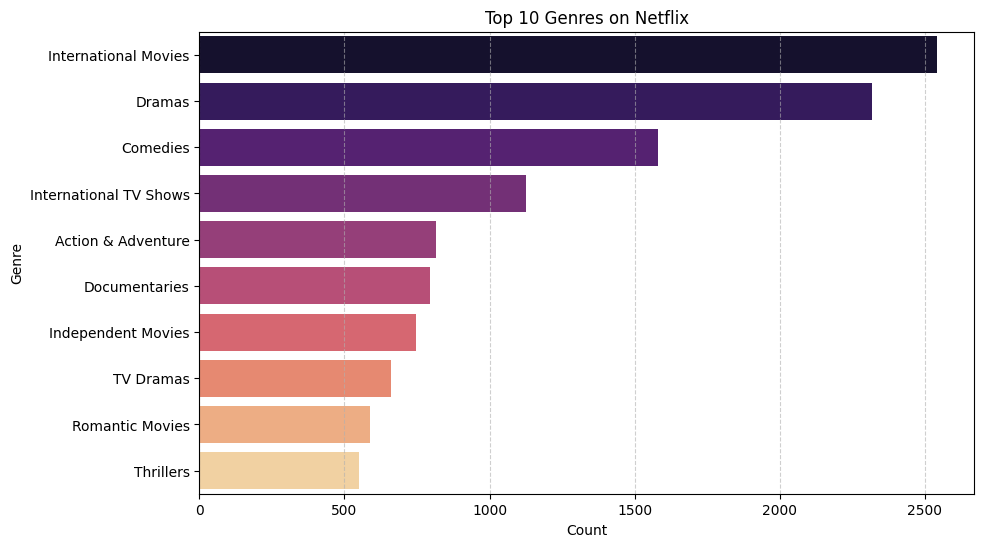

In [ ]:
from collections import Counter

# Split the 'listed_in' column into lists
genres = df['listed_in'].str.split(', ')

# Flatten the list of lists into a single list
genre_list = genres.sum()

# Count the frequency of each genre
top_genres = Counter(genre_list).most_common(10)

# Separate genre names and their counts
genre_names = [g[0] for g in top_genres]
genre_counts = [g[1] for g in top_genres]

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts, y=genre_names, palette='magma')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()